In [30]:
#Upload data from your file path
import pandas as pd

path = "/content/drive/MyDrive/gourav/DataScience/Internship/Veridia/ResumeClassifier/Resume/Resume.csv"

df = pd.read_csv(path)

Phase 1: Understand the Dataset

In [31]:
#First 5 rows
df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [32]:
#Number of rows and columns
df.shape

(2484, 4)

In [33]:
#Check missing values
df.isnull().sum()

,0
ID,0
Resume_str,0
Resume_html,0
Category,0


In [34]:
#Unique job categories
df['Category'].unique()

array(['HR', 'DESIGNER', 'INFORMATION-TECHNOLOGY', 'TEACHER', 'ADVOCATE',
       'BUSINESS-DEVELOPMENT', 'HEALTHCARE', 'FITNESS', 'AGRICULTURE',
       'BPO', 'SALES', 'CONSULTANT', 'DIGITAL-MEDIA', 'AUTOMOBILE',
       'CHEF', 'FINANCE', 'APPAREL', 'ENGINEERING', 'ACCOUNTANT',
       'CONSTRUCTION', 'PUBLIC-RELATIONS', 'BANKING', 'ARTS', 'AVIATION'],
      dtype=object)

In [35]:
#How many resumes per category?
df['Category'].value_counts()

,count
Category,
INFORMATION-TECHNOLOGY,120
BUSINESS-DEVELOPMENT,120
ADVOCATE,118
CHEF,118
ENGINEERING,118
ACCOUNTANT,118
FINANCE,118
FITNESS,117
AVIATION,117


In [36]:
#Example of a resume
df['Resume_str'][0][:1000]

'         HR ADMINISTRATOR/MARKETING ASSOCIATE\n\nHR ADMINISTRATOR       Summary     Dedicated Customer Service Manager with 15+ years of experience in Hospitality and Customer Service Management.   Respected builder and leader of customer-focused teams; strives to instill a shared, enthusiastic commitment to customer service.         Highlights         Focused on customer satisfaction  Team management  Marketing savvy  Conflict resolution techniques     Training and development  Skilled multi-tasker  Client relations specialist           Accomplishments      Missouri DOT Supervisor Training Certification  Certified by IHG in Customer Loyalty and Marketing by Segment   Hilton Worldwide General Manager Training Certification  Accomplished Trainer for cross server hospitality systems such as    Hilton OnQ  ,   Micros    Opera PMS   , Fidelio    OPERA    Reservation System (ORS) ,   Holidex    Completed courses and seminars in customer service, sales strategies, inventory control, loss pr

Phase 2: Data Cleaning & Preprocessing

In [37]:
#Install and import libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [38]:
#Initialize Lemmatizer & Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [39]:
#Cleaning Function
def clean_resume(text):
  #Remove html tags
  text = re.sub(r'<.*?>', ' ', str(text))

  #Remove URLs
  text = re.sub(r'http\S+|www\S+', ' ', text)

  # Remove special characters and digits
  text = re.sub(r'[^a-zA-Z]', ' ', text)

  # Lowercase
  text = text.lower()

  # Tokenize and remove stopwords, then lemmatize
  words = text.split()

  words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
  return ' '.join(words)

In [40]:
#Apply Cleaning
df['Cleaned_Resume'] = df['Resume_str'].apply(clean_resume)

In [41]:
#Check Result
df[['Resume_str', 'Cleaned_Resume']].head()

,Resume_str,Cleaned_Resume
0,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,hr administrator marketing associate hr admini...
1,"HR SPECIALIST, US HR OPERATIONS ...",hr specialist u hr operation summary versatile...
2,HR DIRECTOR Summary Over 2...,hr director summary year experience recruiting...
3,HR SPECIALIST Summary Dedica...,hr specialist summary dedicated driven dynamic...
4,HR MANAGER Skill Highlights ...,hr manager skill highlight hr skill hr departm...


Phase 3: Feature Extraction

In [42]:
#Import library
from sklearn.feature_extraction.text import TfidfVectorizer

#Create TF-IDF Vectorizer
tfidf = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=8000,
    ngram_range=(1,2)
)

In [43]:
#Fit and transform the cleaned resumes
X = tfidf.fit_transform(df['Cleaned_Resume']).toarray()

#Store the target labels
y = df['Category']

In [44]:
#Check the shape
print("Feature matrix shape:", X.shape)
print("Number of categories:", len(y.unique()))

Feature matrix shape: (2484, 8000)
Number of categories: 24


Phase 4: Splitting the Data

In [45]:
#Import function
from sklearn.model_selection import train_test_split

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
#Check the size
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels:", y_train.shape)
print("Testing labels:", y_test.shape)

Training data shape: (1987, 8000)
Testing data shape: (497, 8000)
Training labels: (1987,)
Testing labels: (497,)


Phase 5: Model Training

In [47]:
#Import model and evaluation tools
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Create the model
model = LogisticRegression(max_iter=1000)

In [48]:
#Train the model
model.fit(X_train, y_train)

#Make predictions
y_pred = model.predict(X_test)

In [49]:
#Evaluate performance
print("Model Evaluation Results:")
print("----------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Evaluation Results:
----------------------------
Accuracy: 0.6639839034205232

Classification Report:
                         precision    recall  f1-score   support

            ACCOUNTANT       0.69      0.83      0.75        24
              ADVOCATE       0.41      0.54      0.46        24
           AGRICULTURE       1.00      0.31      0.47        13
               APPAREL       0.80      0.21      0.33        19
                  ARTS       0.50      0.24      0.32        21
            AUTOMOBILE       0.00      0.00      0.00         7
              AVIATION       0.86      0.75      0.80        24
               BANKING       0.89      0.70      0.78        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.55      0.88      0.68        24
                  CHEF       0.86      0.75      0.80        24
          CONSTRUCTION       0.75      0.82      0.78        22
            CONSULTANT       0.56      0.22      0.31     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [50]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7364185110663984
                        precision    recall  f1-score   support

            ACCOUNTANT       0.76      0.92      0.83        24
              ADVOCATE       0.65      0.71      0.68        24
           AGRICULTURE       0.90      0.69      0.78        13
               APPAREL       0.70      0.37      0.48        19
                  ARTS       0.73      0.38      0.50        21
            AUTOMOBILE       1.00      0.29      0.44         7
              AVIATION       0.86      0.79      0.83        24
               BANKING       0.79      0.83      0.81        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.70      0.88      0.78        24
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.75      0.82      0.78        22
            CONSULTANT       0.83      0.43      0.57        23
              DESIGNER       0.86      0.90      0.88        21
         D

Phase 6: Improve Model Accuracy

In [51]:
svm_tuned = LinearSVC(C=1.0, penalty='l2', max_iter=2000)
svm_tuned.fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)

print("Improved Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Improved Accuracy: 0.7364185110663984
                        precision    recall  f1-score   support

            ACCOUNTANT       0.76      0.92      0.83        24
              ADVOCATE       0.65      0.71      0.68        24
           AGRICULTURE       0.90      0.69      0.78        13
               APPAREL       0.70      0.37      0.48        19
                  ARTS       0.73      0.38      0.50        21
            AUTOMOBILE       1.00      0.29      0.44         7
              AVIATION       0.86      0.79      0.83        24
               BANKING       0.79      0.83      0.81        23
                   BPO       0.00      0.00      0.00         4
  BUSINESS-DEVELOPMENT       0.70      0.88      0.78        24
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.75      0.82      0.78        22
            CONSULTANT       0.83      0.43      0.57        23
              DESIGNER       0.86      0.90      0.88        21
 

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [1000, 2000, 3000]
}

grid = GridSearchCV(LinearSVC(), param_grid, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}


In [59]:
best_model = LinearSVC(C=10, penalty='l2', max_iter=1000)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

new_accuracy = accuracy_score(y_test, y_pred)
print("Improved Accuracy:", new_accuracy)
print(classification_report(y_test, y_pred))

Improved Accuracy: 0.7505030181086519
                        precision    recall  f1-score   support

            ACCOUNTANT       0.78      0.88      0.82        24
              ADVOCATE       0.75      0.75      0.75        24
           AGRICULTURE       0.78      0.54      0.64        13
               APPAREL       0.82      0.47      0.60        19
                  ARTS       0.71      0.48      0.57        21
            AUTOMOBILE       1.00      0.43      0.60         7
              AVIATION       0.86      0.79      0.83        24
               BANKING       0.78      0.78      0.78        23
                   BPO       0.33      0.25      0.29         4
  BUSINESS-DEVELOPMENT       0.70      0.88      0.78        24
                  CHEF       0.85      0.71      0.77        24
          CONSTRUCTION       0.78      0.82      0.80        22
            CONSULTANT       0.73      0.48      0.58        23
              DESIGNER       0.86      0.90      0.88        21
 

Phase 7: Compare Model Performance (Before vs After)

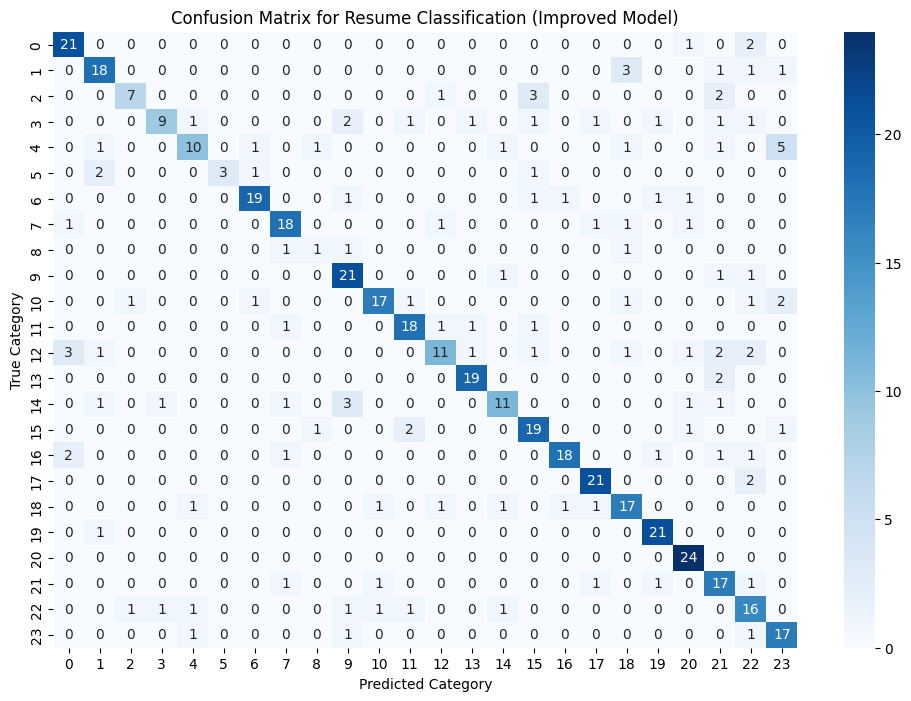

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix for the improved model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12,8))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d')
plt.title("Confusion Matrix for Resume Classification (Improved Model)")
plt.xlabel("Predicted Category")
plt.ylabel("True Category")
plt.show()


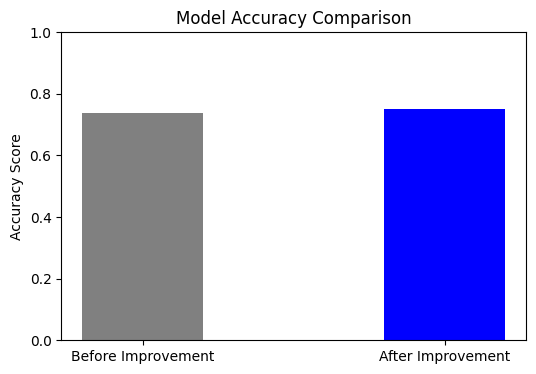

In [62]:
# Compare accuracies
old_accuracy = 0.7364   # old SVM accuracy
new_accuracy = new_accuracy  # from best_model above

plt.figure(figsize=(6,4))
plt.bar(['Before Improvement', 'After Improvement'],
        [old_accuracy, new_accuracy],
        width=0.4, color=['gray','blue'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.ylim(0,1)
plt.show()

Phase 8: Save the Model and Vectorizer

In [63]:
import joblib

joblib.dump(best_model, "resume_classifier.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")
print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!


In [67]:
from google.colab import files
uploaded = files.upload()  # Upload resume_app.py here

Saving app.py to app (1).py


In [68]:
!ngrok authtoken 3105XZdIbfik8w23CqqErgGvfCD_7aWM63K2zBX9vdajWJyGg

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [69]:
# Install ngrok
!pip install pyngrok streamlit --quiet

# Import ngrok
from pyngrok import ngrok

# Run Streamlit in the background
!streamlit run resume_app.py &

# Create public URL
public_url = ngrok.connect(8501)
print("Open this URL in your browser:", public_url)

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: resume_app.py
Open this URL in your browser: NgrokTunnel: "https://cfc782851cfc.ngrok-free.app" -> "http://localhost:8501"
